# Data Visualization

## Imports

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
# Datascience libraries
import pandas as pd
import numpy as np

# basic python libraries
import math
import time
import random
import json
from tqdm.notebook import tqdm as pb

# plot
import matplotlib.pyplot as plt
from pylab import rcParams
rcParams['figure.figsize'] = 16, 10

In [ ]:
#Parser de fichiers
df = pd.read_csv("drive/My Drive/Colab Notebooks/data.txt",header=None)
df.head()

,0,1,2,3
0,0,-11.03,-82.33,46
1,1,-4.93,-98.05,96
2,2,81.52,2.41,49
3,3,36.82,-42.62,71
4,4,-69.86,11.88,27


## Trying K-means

Give a try to the k-means clustering in order to see if it can classify correctly the data.

In [ ]:
from sklearn.cluster import KMeans

In [ ]:
M = df.values
_n = 1000

In [ ]:
kmeans = KMeans(n_clusters=_n, random_state=0).fit(M[:,[1,2]])

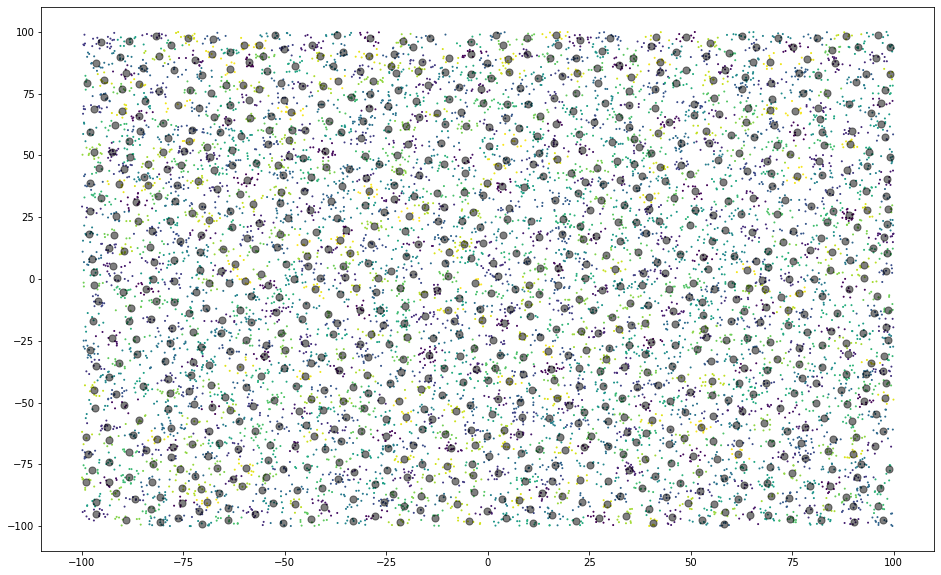

In [ ]:
plt.scatter(M[:, 1], M[:, 2], c=kmeans.labels_, s=1, cmap='viridis')
centers = kmeans.cluster_centers_
plt.scatter(centers[:, 0], centers[:, 1], c='black', s=50, alpha=0.5);

In [ ]:
clusters_indicators = np.zeros((_n,3))
for i, cc in enumerate(kmeans.cluster_centers_):
    for j in kmeans.labels_:
        if j == i:
            clusters_indicators[i,0] += M[j,3]
            clusters_indicators[i,1] += math.sqrt((M[j,1] - cc[0])**2 + (M[j,2] - cc[1])**2)
            clusters_indicators[i,2] += 1

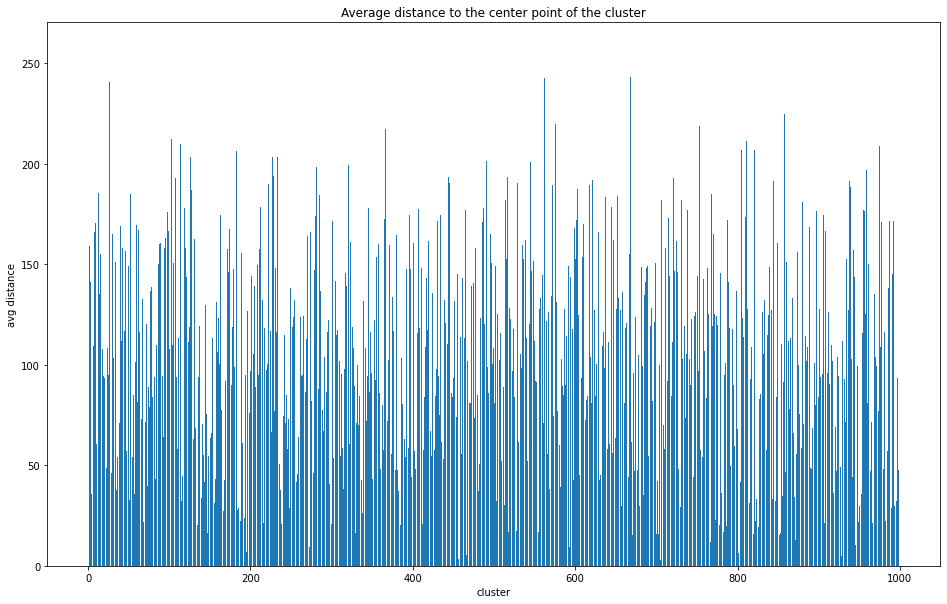

In [ ]:
avg_distance_to_center = clusters_indicators[:,1]/clusters_indicators[:,2]
plt.bar([i for i in range(len(avg_distance_to_center))], avg_distance_to_center)
plt.title('Average distance to the center point of the cluster')
plt.xlabel('cluster')
plt.ylabel('avg distance')
plt.show()

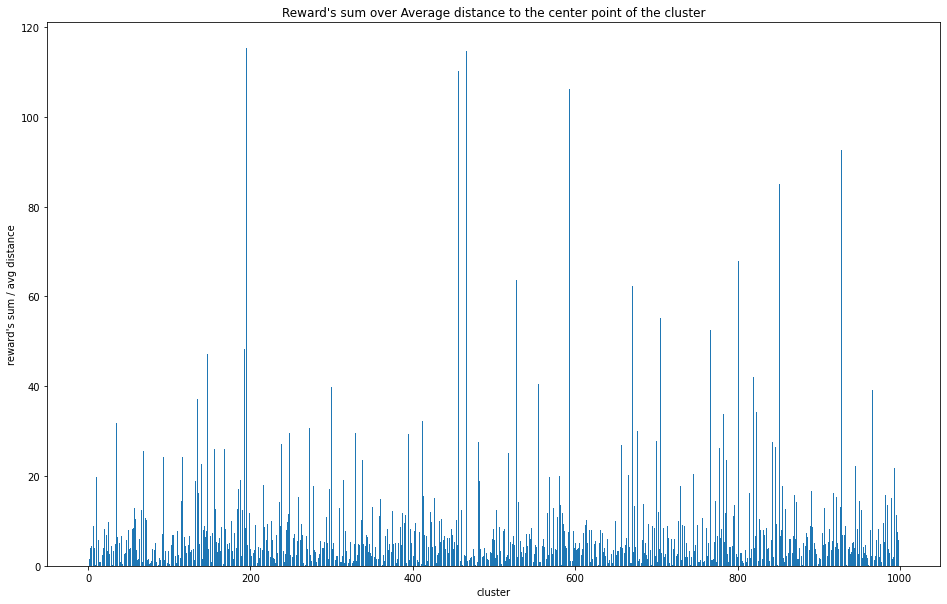

In [ ]:
reward_sum_on_avg_distance_to_center = clusters_indicators[:,0]/(clusters_indicators[:,1]/clusters_indicators[:,2])
plt.bar([i for i in range(len(reward_sum_on_avg_distance_to_center))], reward_sum_on_avg_distance_to_center)
plt.title('Reward\'s sum over Average distance to the center point of the cluster')
plt.xlabel('cluster')
plt.ylabel('reward\'s sum / avg distance')
plt.show()

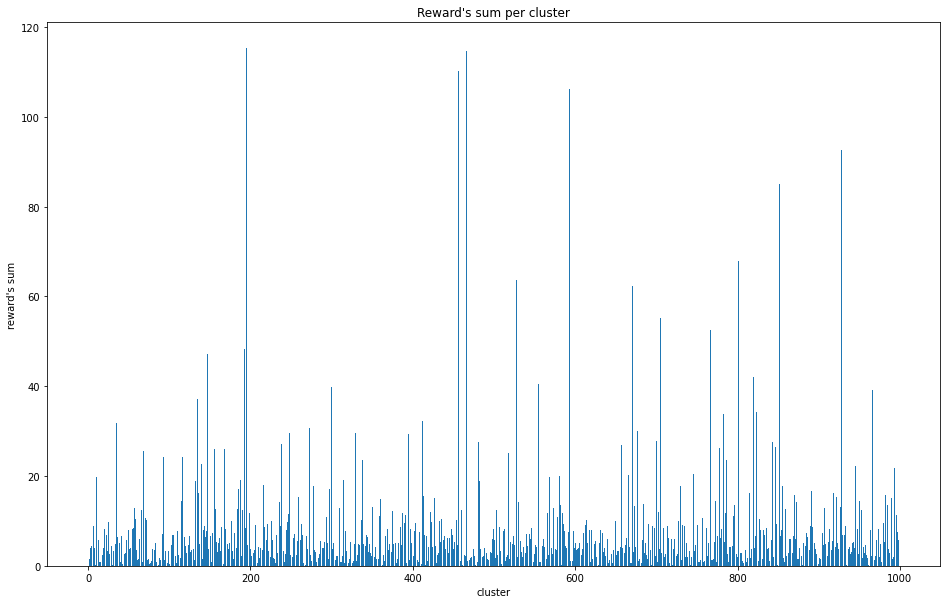

In [ ]:
reward_sum = clusters_indicators[:,0]
plt.bar([i for i in range(len(reward_sum_on_avg_distance_to_center))], reward_sum_on_avg_distance_to_center)
plt.title('Reward\'s sum per cluster')
plt.xlabel('cluster')
plt.ylabel('reward\'s sum')
plt.show()

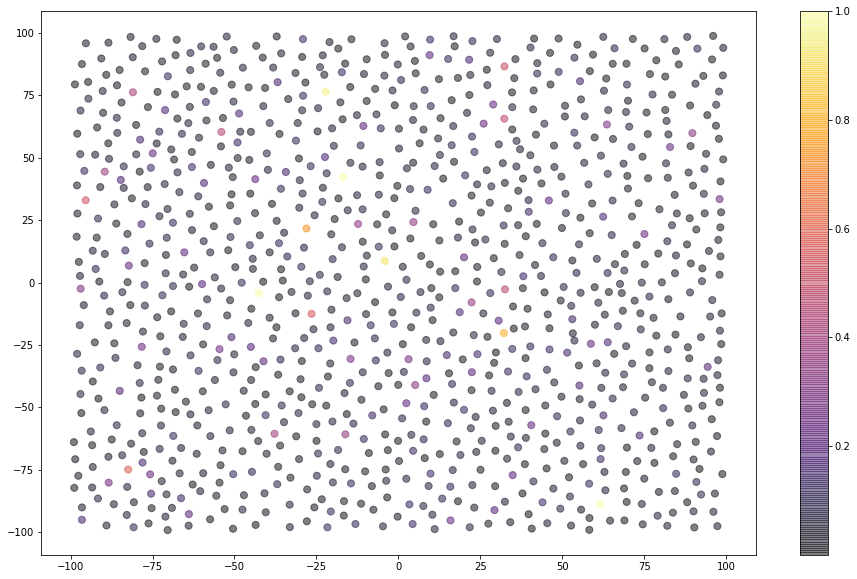

In [ ]:
temp = reward_sum_on_avg_distance_to_center/np.max(reward_sum_on_avg_distance_to_center)
centers = kmeans.cluster_centers_
sc = plt.scatter(centers[:, 0], centers[:, 1], c=temp, s=50, alpha=0.5, cmap="inferno");
plt.colorbar(sc)
plt.show()

In [ ]:
temp = [[clusters_indicators[i,0],clusters_indicators[i,1],clusters_indicators[i,2], kmeans.cluster_centers_[i]] for i in range(len(clusters_indicators))]
temp.sort(key=lambda x: x[0], reverse=True)
temp = np.matrix(temp)

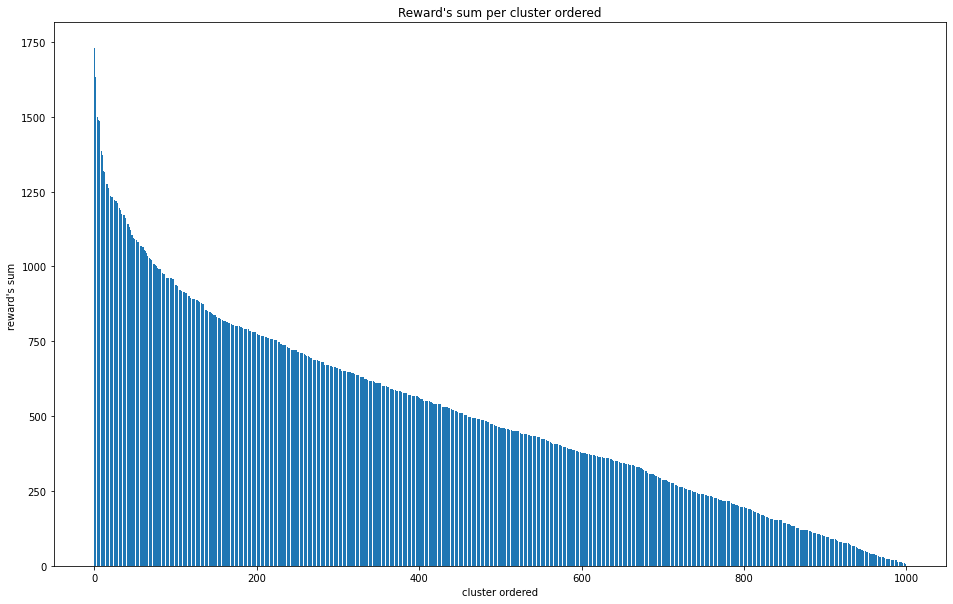

In [ ]:
plt.bar([i for i in range(temp.shape[0])], np.ravel(temp[:,0]))
plt.title('Reward\'s sum per cluster ordered')
plt.xlabel('cluster ordered')
plt.ylabel('reward\'s sum ')
plt.show()

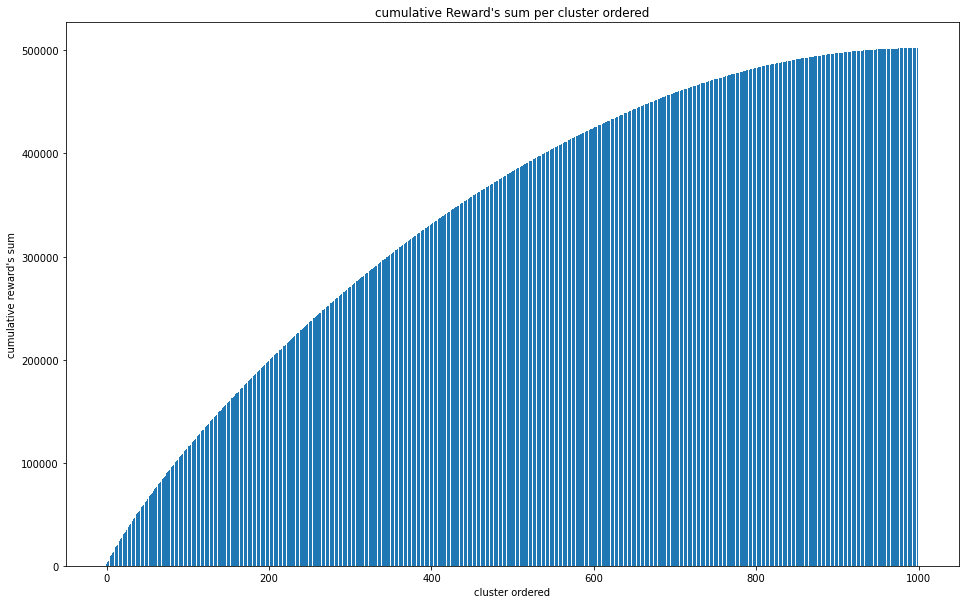

In [ ]:
temp2 = []
for i in range(temp.shape[0]):
    if i == 0:
        temp2.append(temp[i,0])
    else:
        temp2.append(temp2[i-1]+temp[i,0])
plt.bar([i for i in range(len(temp2))], temp2)
plt.title('cumulative Reward\'s sum per cluster ordered')
plt.xlabel('cluster ordered')
plt.ylabel('cumulative reward\'s sum')
plt.show()

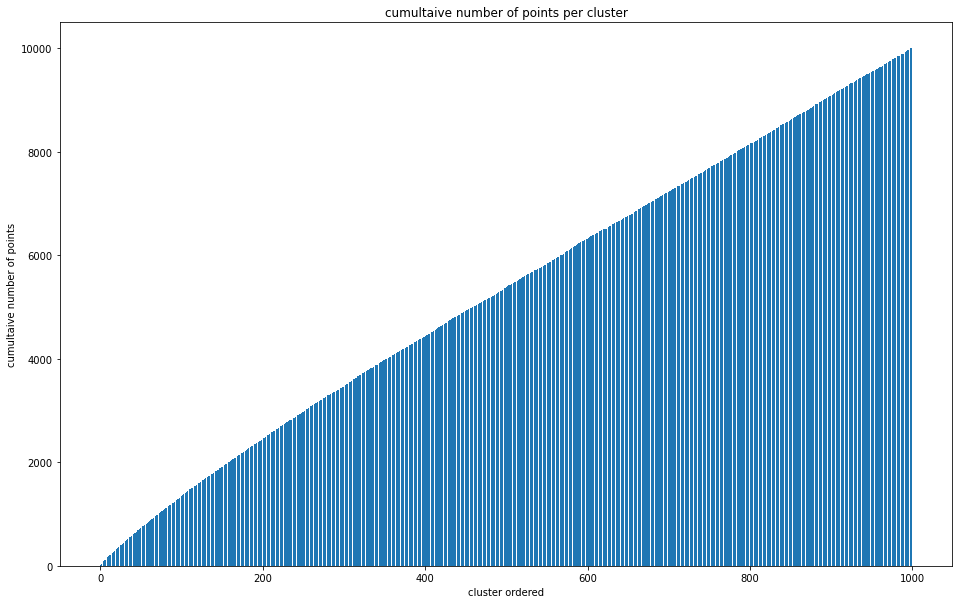

In [ ]:
temp2 = []
for i in range(temp.shape[0]):
    if i == 0:
        temp2.append(temp[i,2])
    else:
        temp2.append(temp2[i-1]+temp[i,2])
plt.bar([i for i in range(len(temp2))], temp2)
plt.title('cumultaive number of points per cluster')
plt.xlabel('cluster ordered')
plt.ylabel('cumultaive number of points')
plt.show()

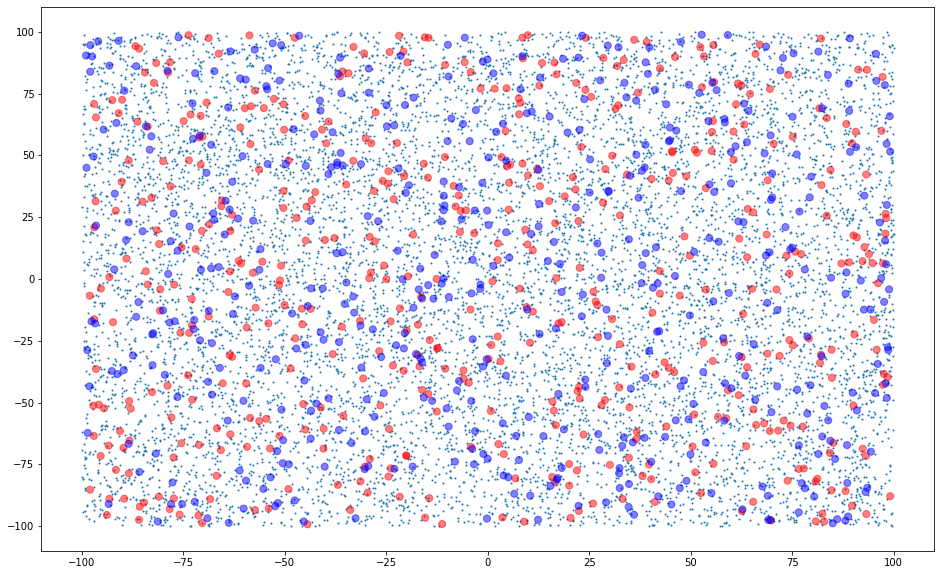

In [ ]:
plt.scatter(M[:, 1], M[:, 2], s=1)
temp2 = np.array([temp[i,3] for i in range(temp.shape[0])])
plt.scatter(temp2[:, 0], centers[:, 1], c=['r' if i < 500 else 'b' for i in range(temp.shape[0])], s=50, alpha=0.5)
plt.show()

## High Reward repartition

In [ ]:
ind = M[:,3].argsort()
M_sorted = M[[ind[ind.shape[0]-i-1] for i in range(ind.shape[0])]]

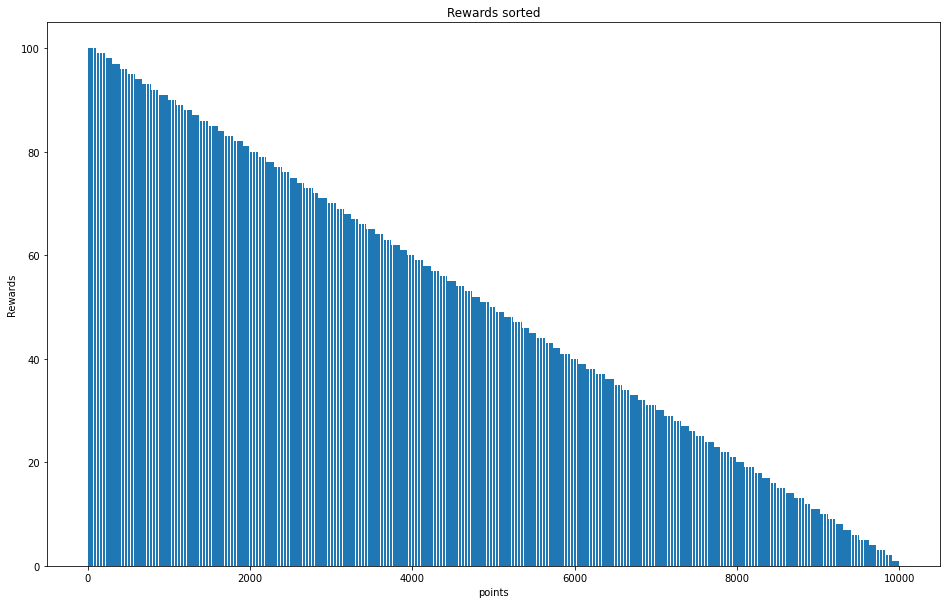

In [ ]:
plt.bar(np.arange(M_sorted.shape[0]), M_sorted[:,3])
plt.title('Rewards sorted')
plt.xlabel('points')
plt.ylabel('Rewards')
plt.show()

In [ ]:
cumulative_rewards = np.zeros((M_sorted.shape[0]))
for i in range(M_sorted.shape[0]):
    cumulative_rewards[i] = M_sorted[i,3]
    if i != 0:
        cumulative_rewards[i] += cumulative_rewards[i-1]

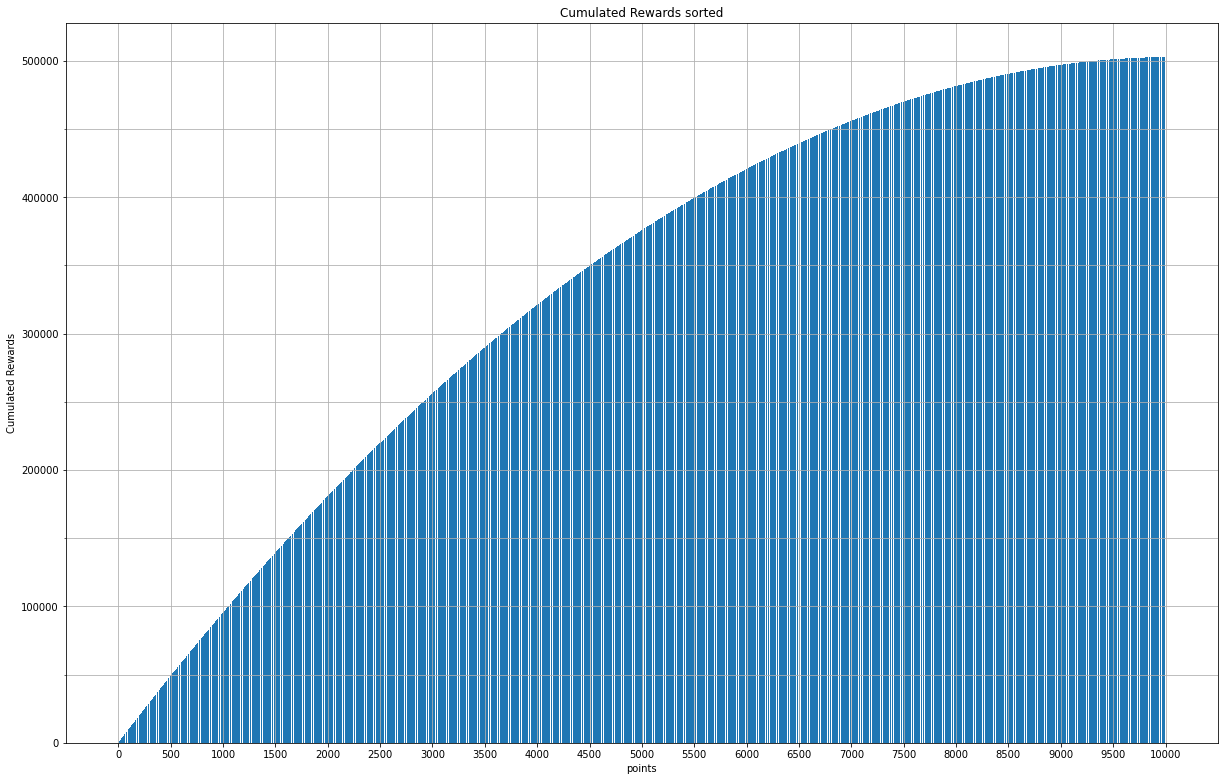

In [ ]:
fig = plt.figure()
ax = fig.add_axes([0,0,1,1])
ax.bar(np.arange(M_sorted.shape[0]), cumulative_rewards)
plt.title('Cumulated Rewards sorted')
plt.xlabel('points')
plt.ylabel('Cumulated Rewards')
ax.set_xticks(np.arange(0, 10001, 500))
ax.set_xticks(np.arange(0, 10001, 1000), minor=True)
ax.set_yticks(np.arange(0, 500001, 100000))
ax.set_yticks(np.arange(0, 500001, 50000), minor=True)
ax.grid(which='both')
plt.show()

In [ ]:
def _get_sub_section(M, coord1, coord2):
    indices = []
    for i in range(M.shape[0]):
        if M[i,1] >= coord1[0] and M[i,1] <= coord2[0] and M[i, 2] >= coord1[1] and M[i, 2] <= coord2[1]:
            indices.append(i)
    return np.copy(M)[indices,:]

In [ ]:
def _get_all_sub_sections_vertices(M, slice_size):
    n = int(200/slice_size)
    sub_sections = np.zeros((n,n))
    for i in pb(range(n)):
        for j in range(n):
            gap = 0.
            if i != 0:
                gap = 0.01
            sub_sections[i,j] = np.sum(_get_sub_section(M, (-100+i*slice_size+gap,-100+j*slice_size), (-100+(i+1)*slice_size+gap,-100+(j+1)*slice_size))[:,3])
    return sub_sections

In [ ]:
sections = _get_all_sub_sections_vertices(M, 5)

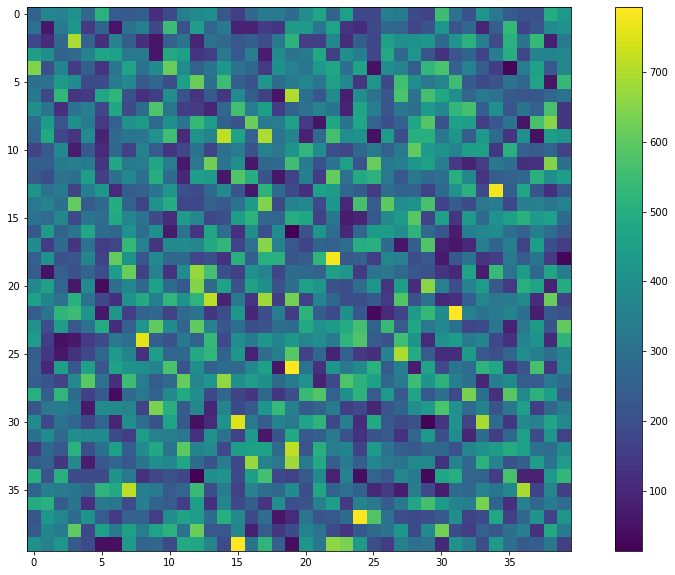

In [ ]:
plt.imshow(sections)
plt.colorbar()
plt.show()